<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_IEEE_Deteccion_Fraude/blob/main/Scripts/IEEE_Deteccion_Fraude__Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos - Proyecto IEEE-CIS Deteccion de fraude

Sitio del concurso: https://www.kaggle.com/competitions/ieee-fraud-detection/overview
  
Datos: https://drive.google.com/drive/folders/1lhKnZfq2jQKkivLTFbmWn6ZSvNm8cKIe?usp=share_link
  
Deben seguir las instrucciones dadas en el pdf, esto es
- Ser invitados como colaboradores del repositorio en GitHub
- Abrir la carpeta y hacer un acceso directo en su drive
- Conectar el Colab con su drive

Recuerden que deben cambiar la carpeta que será el workspace o las rutas para poder importar los datos.

Finalmente, seguir las instrucciones del pdf para escribir en GitHub los cambios para que se noten sus aportes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Preliminares

In [ ]:
import pandas as pd
import numpy as np
import os
import textwrap
import matplotlib.pyplot as pl

#Permite ver en los resultados todas las columnas y las filas, Grupo Marianita, Herdiz, Erick
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
! pip install skimpy

In [ ]:
!pip install -U dataprep

In [ ]:
from skimpy import skim

In [ ]:
from dataprep.eda import create_report

In [ ]:
## Esto debe ser modificado por uds, por favor creen otra linea y comenten esta
##os.chdir('/content/drive/MyDrive/CURSOS_DICTADOS/TUTORIAS/PrDS_2023_01_IEEE_Deteccion_Fraude')
os.chdir('/content/drive/MyDrive/cc_fraude/dataset')


In [ ]:
## HZ CONEXION
os.chdir('/content/drive/MyDrive/Python_Colab/Datos/')
dir_base_catego='/content/drive/MyDrive/Python_Colab/Datos/'

In [ ]:
# Carpeta base Drive - HL
dir_base = "/content/drive/MyDrive/ds_ieee_fraud_detection"
# Cargar directamente el el DF de Entrenamiento Combinado / Unido
train = pd.read_csv(dir_base+'/train_combined.csv')
print(train.shape)

In [ ]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y
que no toque hacer desplazamiento horizontal'''
wrapper = textwrap.TextWrapper(width=100)

## EDA

### Importar

#### Importar

In [ ]:
train_identity= pd.read_csv('train_identity.csv')
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34',
'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
'id_32']


In [ ]:
train_transaction= pd.read_csv('train_transaction.csv')
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5',
'M6', 'M7', 'M8', 'M9']
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT', 'card1']
Columnas Float
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3',
'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5',
'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34',
'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48',
'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V

#### Cambiar el tipo de datos a las columnas

De acuerdo al sitio oficial, todos es numérico excepto:   

'TransactionID' que es ID, entero, 'isFraud' que es 0 o 1 y 'TransactionDT' que es timedelta (puede tomarse como entero)

**Categorical Features - Transaction**  
ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9

**Categorical Features - Identity**  
DeviceType, DeviceInfo, id_12 - id_38  

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

##### Transacciones

In [ ]:
# Columnas categoricas
cols_cat_trns= ['ProductCD',
            'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
            'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain',
            'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [ ]:
# Columnas enteras
cols_int_trns= ['TransactionID', 'isFraud', 'TransactionDT']

In [ ]:
for column in train_transaction.columns:
    if column in cols_cat_trns:
        train_transaction[column] = train_transaction[column].astype(str)
    elif column in cols_int_trns:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce', downcast= 'integer' )
    else:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce')

In [ ]:
for c in train_transaction.columns:
  if c in cols_cat_trns:
    train_transaction[c] = train_transaction[c].astype('category')

In [ ]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
[]
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT']
Columnas Float
['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95',
'V96', 'V97', 'V98', 'V99'

---
##### Identidades

Para la de identidades, todo es categorico excepto:




In [ ]:
# Columnas categoricas
cols_int_idnt= ['TransactionID']

In [ ]:
# Columnas numericas
cols_num_idnt= ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11']


In [ ]:
for column in train_identity.columns:
    if column in cols_int_idnt:
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'integer' )
    elif column in cols_num_idnt:
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'float')
    else:
        train_identity[column] = train_identity[column].astype(str)

In [ ]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,70787.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NotFound,nan,-480.0,New,NotFound,166.0,nan,542.0,144.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,98945.00,NaN,NaN,0.00,-5.00,NaN,NaN,NaN,NaN,100.00,NotFound,49.0,-300.0,New,NotFound,166.0,nan,621.0,500.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,191631.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,100.00,NotFound,52.0,nan,Found,Found,121.0,nan,410.0,142.0,nan,nan,nan,nan,nan,nan,nan,Found,Found,nan,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,Windows
3,2987011,-5.00,221832.00,NaN,NaN,0.00,-6.00,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,nan,New,NotFound,225.0,nan,176.0,507.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,nan,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,nan
4,2987016,0.00,7460.00,0.00,0.00,1.00,0.00,NaN,NaN,0.00,0.00,100.00,NotFound,nan,-300.0,Found,Found,166.0,15.0,529.0,575.0,nan,nan,nan,nan,nan,nan,nan,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


#### Unir los datos

In [ ]:
train= pd.merge( train_transaction, train_identity, how= "left", on= 'TransactionID')

In [ ]:
train.shape

(590540, 434)

In [ ]:
## Para proteger la ram, eliminar
del train_transaction
del train_identity

In [ ]:
import gc
gc.collect()

0

### EDA Multivariado

Para encontrar
- Relaciones entre variables como variables que pueden producir tener multicolinearidad o concurvidad, etc.
- Cómo se comportan las variables vs la variable Y
- Existen valores aberrantes cuando se comparan variables (o pares de variables) vs nuestra Y

***#El comportamiento de las variables vs la variable Y***

***Análisis Bivariado. Grupo Marianita, Herdiz, Erick ***

Para el producto C existe 8008 fraudes.
* Para el producto H existe 1574 fraudes.
* Para el producto R existe 1426 fraudes.
* Para el producto w existe 8969 fraudes.

* Para tarjetas de crédito existe 9950 fraudes.
* Para tarjetas de débito existe 10713 fraudes.

* Para email: anonymous.com existe 859 fraudes.
* Para email: gmail.com	12733 fraudes.
* Para email: hotmail.com 2396 fraudes.
* Para email: otros 2378 fraudes.
* Para email: yahoo.com 2297 fraudes.

* Para card4: american express 239 fraudes
* Para card4: discover 514 fraudes.
* Para card4: mastercard 6496 fraudes
* Para card4: visa 13414 fraudes.

* Los fraudes son mayores en el producto w.
* Los fraudes se dan con la tarjeta de débito
* Los fraudes se dan con mayor frecuencia con el dominio gmail.
* Los fraudes se dan más con la tarjeta Visa.


In [ ]:
# Grafico entre monto Vs. Producto CD y card4
#con fraude
train_categoria.groupby(["ProductCD","card4"])["TransactionAmt].agg("sum").plot(kind="bar")

<Axes: xlabel='ProductCD,isFraud'>

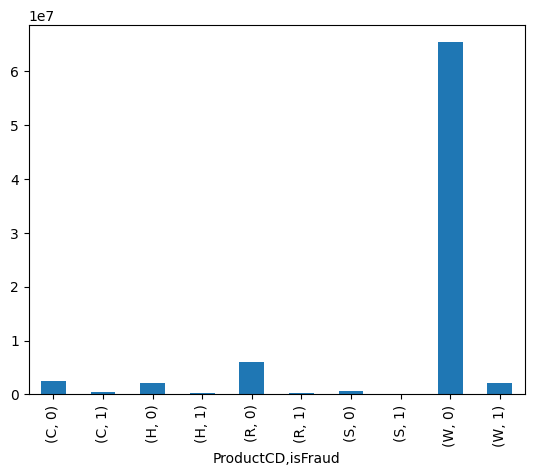

In [ ]:
train_categoria.groupby(["ProductCD","isFraud"])["TransactionAmt"].agg("sum").plot(kind="bar")

<Axes: xlabel='card4,isFraud'>

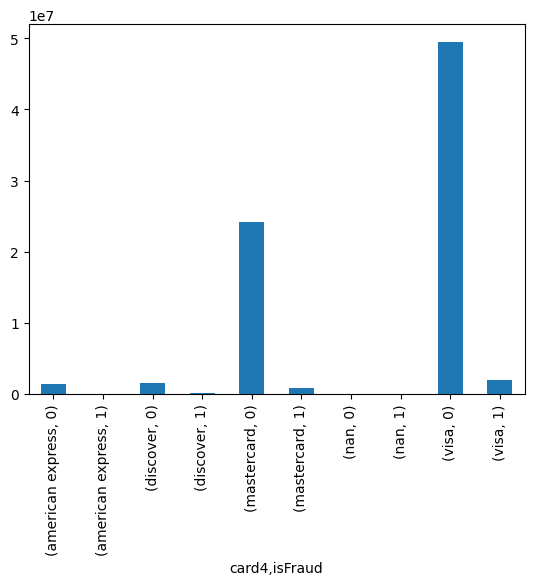

In [ ]:
train_categoria.groupby(["card4","isFraud"])["TransactionAmt"].agg("sum").plot(kind="bar")

<Axes: xlabel='ProductCD,card4'>

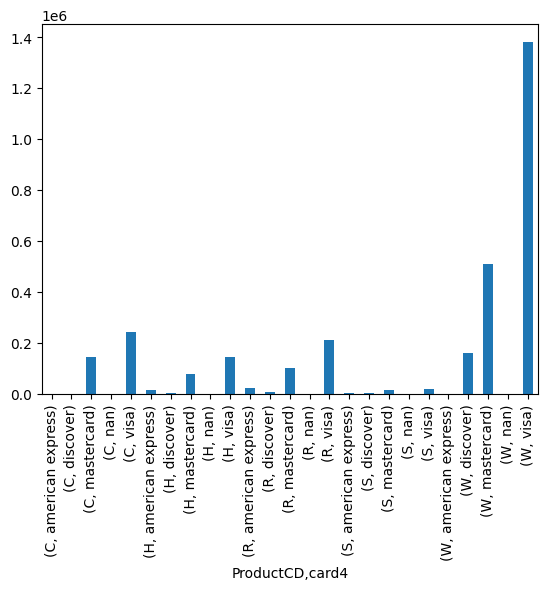

In [ ]:
train_categoria[train_categoria["isFraud"]==1].groupby(["ProductCD","card4"])["TransactionAmt"].agg("sum").plot(kind="bar")

<Axes: xlabel='card4'>

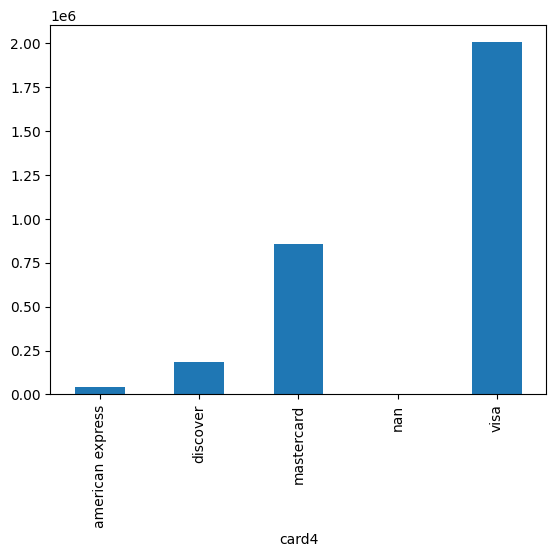

In [ ]:
train_categoria[train_categoria["isFraud"]==1].groupby(["card4"])["TransactionAmt"].agg("sum").plot(kind="bar")

In [ ]:
pd.crosstab(train_categoria['isFraud'],train_categoria['ProductCD'])

ProductCD,C,H,R,S,W
isFraud,,,,,
0,60511,31450,36273,10942,430701
1,8008,1574,1426,686,8969


In [ ]:
pd.crosstab(train_categoria['card4'],train_categoria['ProductCD'])

ProductCD,C,H,R,S,W
card4,,,,,
american express,2,1566,6138,622,0
discover,0,603,1089,580,4379
mastercard,27418,7938,7432,4042,142387
visa,41099,22917,23040,6384,292904


In [ ]:
pd.crosstab(train_categoria['card6'],train_categoria['ProductCD'])

ProductCD,C,H,R,S,W
card6,,,,,
charge card,12,0,3,0,0
credit,27551,17656,26499,6527,70753
debit,40956,15368,11197,5101,368887
debit or credit,0,0,0,0,30


In [ ]:
pd.crosstab(train_categoria['card6'],train_categoria['isFraud'])

isFraud,0,1
card6,,
charge card,15,0
credit,139036,9950
debit,430796,10713
debit or credit,30,0


In [ ]:
pd.crosstab(train_categoria['P_emaildomain_Agr'],train_categoria['isFraud'])

isFraud,0,1
P_emaildomain_Agr,,
anonymous.com,36139,859
gmail.com,310078,12733
hotmail.com,42854,2396
otros,82169,2378
yahoo.com,98637,2297


In [ ]:
pd.crosstab(train_categoria['addr1_Agr'],train_categoria['isFraud'])

isFraud,0,1
addr1_Agr,,
204,40900,1120
264,39142,728
299,103315,8726
325,41664,1087
otros,344856,9002


In [ ]:
pd.crosstab(train_categoria['card4'],train_categoria['isFraud'])

isFraud,0,1
card4,,
american express,8089,239
discover,6137,514
mastercard,182721,6496
visa,372930,13414


In [ ]:
pd.crosstab(train_categoria['card6'],train_categoria['isFraud'])

isFraud,0,1
card6,,
charge card,15,0
credit,139036,9950
debit,430796,10713
debit or credit,30,0


#### ++ Variables con alta correlación

In [ ]:
id_corr_mat = train_categoria.corr()   ## Grupo Marianita, Herdiz, Erick
id_corr_mat

<ipython-input-79-94f135d7b3df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  id_corr_mat = train_categoria.corr()   ## Grupo Marianita, Herdiz, Erick


,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.00,0.01,1.00,0.01,0.00,-0.05,-0.06,-0.01,-0.06,0.02,-0.05,-0.06,-0.06,0.03,-0.06,-0.05,-0.06,-0.02,-0.04,0.07,0.05,0.02,0.09,0.03,0.09,0.18,0.10,-0.00,0.07,0.08,-0.05,-0.03,0.07,0.08,0.06,0.06,0.17,0.17,0.02,0.03,-0.00,0.00,-0.00,0.01,0.01,-0.02,-0.02,0.01,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,0.07,0.07,0.00,-0.00,0.02,0.03,0.03,0.04,0.00,0.01,-0.02,-0.01,-0.00,-0.02,-0.01,0.00,0.01,-0.01,-0.00,0.08,0.08,-0.03,0.00,0.01,0.04,0.04,0.02,0.03,-0.01,-0.00,0.01,0.01,-0.01,-0.01,0.01,0.01,-0.00,-0.00,0.01,-0.00,0.07,0.07,-0.00,0.00,0.01,0.02,0.02,0.03,0.01,0.03,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,-0.00,0.01,0.02,-0.00,-0.00,0.07,0.07,-0.02,-0.01,0.01,0.06,0.07,0.07,0.02,0.08,0.06,0.06,0.06,0.07,0.06,0.07,0.07,-0.02,0.00,0.03,0.02,-0.01,0.01,-0.00,0.01,0.05,0.03,-0.01,0.01,-0.01,-0.01,0.02,0.00,0.01,0.06,0.04,0.06,0.07,0.07,0.00,0.07,0.04,0.06,0.06,0.06,0.02,0.06,0.04,0.06,0.07,0.00,-0.04,-0.02,0.02,0.07,-0.00,0.06,0.04,0.04,0.01,-0.00,0.00,0.06,0.06,0.06,0.07,0.06,0.07,0.07,-0.00,0.00,-0.12,-0.08,-0.10,-0.00,0.06,0.06,0.07,0.01,0.06,-0.00,0.04,0.03,0.04,0.03,0.06,0.06,0.06,0.02,0.05,0.04
isFraud,0.01,1.00,0.01,0.01,-0.00,0.03,0.04,-0.01,0.03,-0.03,0.02,0.03,0.03,-0.03,0.03,0.03,0.03,-0.01,0.01,-0.07,-0.06,-0.04,-0.05,-0.04,-0.07,-0.05,-0.07,0.00,-0.00,0.01,0.03,0.04,-0.01,-0.00,-0.00,0.01,-0.08,-0.08,-0.04,-0.03,0.00,0.15,0.15,0.16,0.16,0.03,0.04,0.14,0.14,0.13,0.11,0.00,0.02,-0.00,-0.00,-0.10,-0.10,0.14,0.14,0.16,0.16,-0.06,-0.05,0.15,0.17,0.17,0.17,0.00,0.15,0.16,0.22,0.24,0.11,0.14,-0.09,-0.09,0.15,0.18,0.20,-0.03,-0.02,0.04,0.05,0.14,0.15,0.13,0.13,0.05,0.07,0.13,0.13,0.00,0.03,0.07,-0.00,-0.10,-0.10,0.13,0.13,0.15,0.16,-0.03,-0.03,0.14,0.13,0.17,0.16,0.16,0.05,0.06,0.14,0.15,0.22,0.22,0.00,-0.00,-0.10,-0.10,0.15,0.16,0.16,-0.00,-0.01,-0.00,0.03,-0.01,0.01,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.00,0.10,0.06,0.08,0.12,0.11,0.12,0.10,0.06,0.08,0.05,0.04,0.05,0.02,0.01,0.02,0.14,0.08,0.11,-0.00,-0.00,-0.00,0.01,0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.07,0.10,0.11,0.04,-0.01,0.00,0.02,0.04,0.04,0.04,0.02,0.03,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.03,0.03,0.13,0.12,0.13,-0.00,-0.00,0.01,0.00,0.02,0.01,0.00,0.04,0.04,0.04,0.05,-0.00,0.01,0.00,0.00,0.00,0.00
TransactionDT,1.00,0.01,1.00,0.01,0.00,-0.05,-0.05,-0.01,-0.05,0.02,-0.05,-0.06,-0.06,0.03,-0.06,-0.05,-0.05,-0.02,-0.04,0.07,0.05,0.02,0.09,0.03,0.09,0.18,0.10,-0.00,0.07,0.08,-0.05,-0.03,0.07,0.08,0.06,0.06,0.17,0.17,0.03,0.03,-0.00,-0.00,-0.00,0.01,0.01,-0.02,-0.02,0.01,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,0.06,0.06,-0.00,-0.00,0.01,0.03,0.03,0.04,0.00,0.01,-0.02,-0.01,-0.00,-0.02,-0.01,0.00,0.01,-0.01,-0.00,0.08,0.07,-0.03,0.00,0.01,0.04,0.05,0.02,0.03,-0.01,-0.00,0.00,0.01,-0.01,-0.01,0.00,0.01,-0.00,-0.00,0.00,-0.00,0.06,0.06,-0.00,0.00,0.01,0.02,0.03,0.03,0.01,0.03,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,-0.00,0.01,0.02,-0.00,-0.00,0.07,0.07,-0.02,-0.01,0.00,0.06,0.07,0.07,0.02,0.08,0.06,0.06,0.06,0.07,0.06,0.07,0.07,-0.02,0.00,0.03,0.02,-0.01,0.01,-0.00,0.01,0.05,0.03,-0.01,0.01,-0.01,-0.01,0.02,0.00,0.01,0.06,0.04,0.06,0.07,0.07,0.0